# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadia Balqis
- **Email:** Balqisnadia7303@gmail.com
- **ID Dicoding:** NadiaBalqis

## Menentukan Pertanyaan Bisnis

1. Bagaimana Pengaruh Musim terhadap penyewaan sepeda?
2. Bagaimana pengaruh hari libur dan kerja terhadap penyewaan sepeda?
3. Apakah terdapat hubungan antara jumlah pendaftar dengan temperatur(suhu)?
4. Berapa jumlah total sewa sepeda untuk bulan Mei 2012 selama musim semi ?
5. Bagaimana tren penggunaan layanan bike sharing dalam setiap tahun, bulan, dan jam?
6. Apa faktor-faktor lingkungan yang berpengaruh terhadap pengguna/penyewa bike sharing?

## Import Semua Packages/Library yang Digunakan

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Data Wrangling

### Gathering Data

In [53]:
# Memuat Tabel data day
day_df = pd.read_csv("https://raw.githubusercontent.com/Nadblqss/Data/main/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


> Menggunakan library *pandas* untuk membaca dataset *day.csv* dari github repository

In [54]:
# Memuat Tabel data Hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/Nadblqss/Data/main/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


> Menggunakan library *pandas* untuk membaca dataset *hour.csv* dari github repository

### Assessing Data

#### Menilai data day_df

In [55]:
# Memeriksa Tipe data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> Berdasarkan hasil pengamatan pada tabel *day.df* terdapat kesalahan tipe data untuk kolom *dteday* kolom ini seharusnya tipe data *datetime* bukan berupa *object*

In [56]:
# Memeriksa missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Berdasarkan hasil pengecekan missing value diatas pada *day_df* tidak terdapat missing value 

In [57]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


> Berdasarkan hasil pengecekan duplikasi data diatas pada *day_df* tidak terdapat duplikasi data

In [58]:
# Menampilkan statistik deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


> berdasarkan hasil diatas pada tabel *day_df* tidak ditemukan *inaccurate value*

#### Menilai data hour_df

In [59]:
# Mengecek tipe data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


> Berdasarkan hasil pengamatan pada tabel *hour.df* terdapat kesalahan tipe data untuk kolom *dteday* kolom ini seharusnya tipe data *datetime* bukan berupa *object*

In [60]:
# Memeriksa missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Berdasarkan hasil pengecekan missing value diatas pada *hour_df* tidak terdapat missing value 

In [61]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


> Berdasarkan hasil pengecekan duplikasi data diatas pada *hour_df* tidak terdapat duplikasi data

In [62]:
# Menampilkan statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


> berdasarkan hasil diatas pada tabel *hour_df* tidak ditemukan *inaccurate value*

### Cleaning Data

In [63]:
# membersihkan data day_df
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [88]:
# membersihkan data hour_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

> Berdasarkan hasil diatas dapat dilihat bahwa tipe data pada kolom *dteday* telah berubah dari *object* menjadi *datetime*

## Exploratory Data Analysis (EDA)

In [65]:
day_df.describe(include="all")

C:\Users\HP\AppData\Local\Temp\ipykernel_19544\282069457.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [66]:
hour_df.describe(include="all")

C:\Users\HP\AppData\Local\Temp\ipykernel_19544\1264340832.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [67]:
# Menampilkan distribusi plot data numerik pada day_df
num_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
for col in num_cols:
    fig = px.histogram(day_df, x=col, title=f"Distribusi Histogram {col}", color_discrete_sequence=["pink"])
    fig.show()

> Histogram digunakan untuk menunjukkan distribusi data dari data numerik pada day_df. untuk distribusi numerik dipilih histogram dikarenakan histogram menunjukkan sebaran nilai secara kontinu. dapat dilihat pada histogram dari variabel "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt" tidak ada histogram yang membentuk lonceng (simetris) sehingga dapat dikatakan bahwa histogram tidak terdistribusi secara normal

In [68]:
# Menampilkan distribusi plot data numerik pada hour_df
num_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
for col in num_cols:
    fig = px.histogram(hour_df, x=col, title=f"Distribusi Histogram {col}", color_discrete_sequence=["sky blue"])
    fig.show()

> Histogram digunakan untuk menunjukkan distribusi data dari data numerik pada hour_df. dapat dilihat pada histogram dari variabel "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt" tidak ada histogram yang membentuk lonceng (simetris) sehingga dapat dikatakan bahwa histogram tidak terdistribusi secara normal

In [69]:
# Menampilkan distribusi plot data kategorikal pada day_df
cat_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for col in cat_cols:
    fig = px.bar(day_df[col].value_counts().reset_index(), x="index", y=col, color_discrete_sequence=["pink"])
    fig.update_layout(title=f"Distribusi barplot {col}"")
    fig.show()

> barplot digunakan untuk menunjukkan distribusi data dari data kategorik pada day_df. untuk distribusi kategorik dipilih barplot dikarenakan barplot menunjukkan frekuensi atau jumlah nilai dalam setiap kategori dan sangat cocok digunakan pada data diskrit. dapat dilihat interpretasi pada barplot sebagai berikut :
- variabel "season" menunjukkan index 3 (fall) dengan frekuensi terbanyak yaitu sebanyak 188. 
- variabel "yr" menunjukkan index 1 (2012) dengan frekuensi terbanyak yaitu sebanyak 366, 
- variabel "mnth" menunjukkan 7 index dengan frekuensi terbanyak yaitu sebanyak 62, 
- variabel "holiday" menunjukkan index 0 dengan frekuensi terbanyak yaitu sebanyak 710, 
- variabel "weekday"menunjukkan 3 index dengan frekuensi terbanyak yaitu sebanyak 105, 
- variabel "workingday"menunjukkan index 1 (if day is neither weekend nor holiday) dengan frekuensi terbanyak yaitu sebanyak 500, 
- variabel "weathersit"menunjukkan index 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) dengan frekuensi terbanyak yaitu sebanyak 463

In [70]:
# Menampilkan distribusi plot data kategorikal pada hour_df
cat_cols = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

for col in cat_cols:
    fig = px.bar(hour_df[col].value_counts().reset_index(), x="index", y=col, color_discrete_sequence=["sky blue"])
    fig.update_layout(title=f"Distribusi barplot {col}"")
    fig.show()

> barplot digunakan untuk menunjukkan distribusi data dari data kategorik pada hour_df. dapat dilihat interpretasi pada barplot sebagai berikut :
- variabel "season" menunjukkan index 3 (fall) dengan frekuensi terbanyak yaitu sebanyak 4496. 
- variabel "yr" menunjukkan index 1 (2012) dengan frekuensi terbanyak yaitu sebanyak 8734, 
- variabel "mnth" menunjukkan 2 index dengan frekuensi terbanyak yaitu sebanyak 1488, 
- variabel "hr" menunjukkan 2 index dengan frekuensi terbanyak yaitu sebanyak 730, 
- variabel "holiday" menunjukkan index 0 dengan frekuensi terbanyak yaitu sebanyak 16.879k, 
- variabel "weekday"menunjukkan 1 index dengan frekuensi terbanyak yaitu sebanyak 2512, 
- variabel "workingday"menunjukkan index 1 (if day is neither weekend nor holiday) dengan frekuensi terbanyak yaitu sebanyak 11.685k, 
- variabel "weathersit"menunjukkan index 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) dengan frekuensi terbanyak yaitu sebanyak 11.413k.

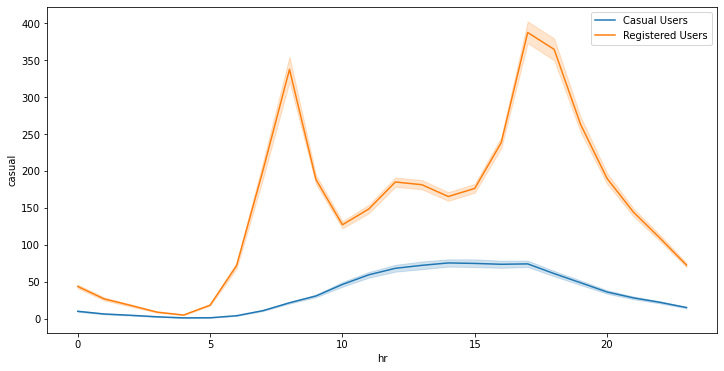

In [89]:
# Menampilkan line chart dari pengguna/penyewa casual dan registered
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="casual", data=hour_df, label="Casual Users")
sns.lineplot(x="hr", y="registered", data=hour_df, label="Registered Users")
plt.legend()

> Dapat dilihat bahwa pada line chart diatas dibandingkan antar dua pengguna/penyewa sepeda yaitu casual user dan registed user. dapat dilihat bahwa garis registered user cenderung naik dan casual user cenderung stabil atau turun, dapat diartikan bahwa jumlah penyewaan sepeda oleh registered user mengalami peningkatan seiring waktu. sehingga dapat diambil kesimpulan bahwa penyewa sepeda rata-rata sudah terdaftar sebagai membership

Text(0.5, 1.0, 'Tren Penyewaan sepeda per jam')

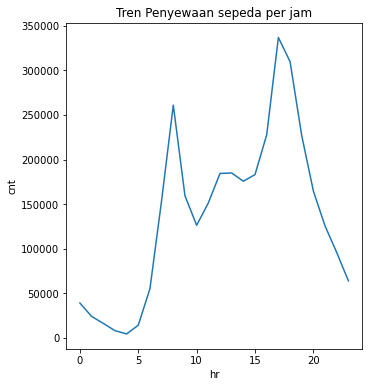

In [87]:
# Menampilkan trend Line pada penyewaan sepeda perjam
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.lineplot(x="hr", y="cnt", data = hour_df, estimator="sum", ci=None)
plt.title("Tren Penyewaan sepeda per jam")

> Berdasarkan trend line diatas dapat dilihat bahwa penyewaan sepeda mengalami peningkatan tertinggi pada jam 15.00-20.00

Text(0.5, 1.0, 'Dampak musim dan dan tahun pada penyewaan sepeda')

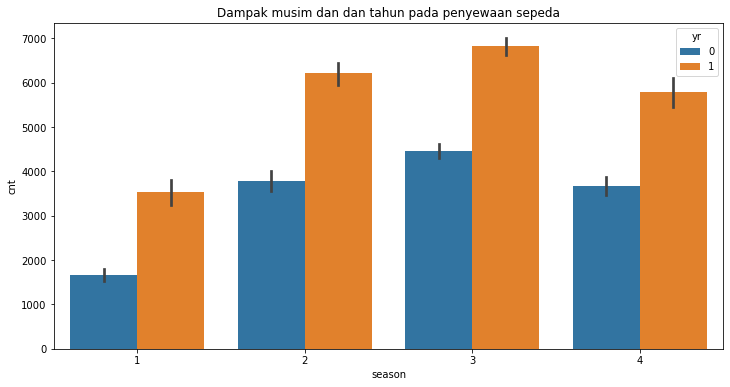

In [73]:
# Menampilkan barplot perbandingan untuk mengetahui Dampak musim dan dan tahun pada penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.barplot(x="season", y="cnt", hue="yr", data=day_df)
plt.title("Dampak musim dan dan tahun pada penyewaan sepeda")

> Berdasarkan barplot diatas dapat dilihat bahwa penyewaan sepeda tertinggi berada pada season fall pada tahun 2012. berdasarkan season dapat diketahui bahwa season fall memiliki penyewaan sepeda tertinggi dan season springer memiliki penyewaan terendah. berdasarkan tahun dapat diketahui bahwa penyewaan sepeda mengalami peningkatan dibanding tahun sebelumnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Musim terhadap penyewaan sepeda?

In [74]:
# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()
# Mengganti angka musim dengan nama musim
seasonal_rentals['season'] = seasonal_rentals['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
# Membuat bar plot untuk memvisualisasikan pengaruh musim terhadap penyewaan sepeda
fig = px.bar(seasonal_rentals, x='season', y='cnt', color='season', 
             title='Jumlah Penyewaan Sepeda Berdasarkan Musim', 
             labels={'cnt': 'Total Rentals', 'season': 'Season'})
fig.show()

Interpretasi :
1. **Spring (Musim Semi):**
   - Warna biru mewakili musim semi pada diagram.
   - Pada musim semi, jumlah penyewaan sepeda terlihat cukup rendah dibanding dengan musim lainnya yaitu sebanyak 471.348
2. **Summer (Musim Panas):**
   - Warna oranye mewakili musim panas pada diagram.
   - Terjadi peningkatan jumlah penyewaan sepeda pada musim panas dibanding musim semi. Musim panas memiliki jumlah penyewaan sepeda tampak cukup tinggi namun tidak lebih tinggi dari musim gugur. adapun jumlah penyewaan sepeda pada musim panas yaitu sebanyak 918.589
3. **Fall (Musim Gugur):**
   - Warna hijau mewakili musim gugur pada diagram.
   - Terjadi peningkatan jumlah penyewaan sepeda pada musim gugur dibanding musim panas. Jumlah penyewaan sepeda pada musim gugur memiliki jumlah penyewaan tertinggi dibanding ketiga musim lainnya adapun jumlah penyewaan sepeda pada musim gugur yaitu sebanyak 1.061.129
4. **Winter (Musim Dingin):**
   - Warna ungu mewakili musim dingin pada diagram.
   - Pada musim dingin, terjadi penurunan dalam jumlah penyewaan sepeda, yang mungkin disebabkan oleh kondisi cuaca yang lebih sulit. adapun jumlah penyewaan pada musim dingin adalah sebanyak 841.613

Dengan melihat diagram ini, dapat disimpulkan bahwa musim gugur memiliki dampak positif terbesar terhadap jumlah penyewaan sepeda, diikuti oleh musim semi dan musim dingin. Musim semi, memiliki jumlah penyewaan yang jauh lebih rendah. diagram warna membantu membedakan kontribusi setiap musim terhadap total penyewaan sepeda. jadi dapat disimpulkan bahwa Musim gugur, dengan pemandangan yang indah dan cuaca yang sejuk, menunjukkan tingkat permintaan yang tinggi, terutama selama festival dan acara musim gugur. Musim panas juga menunjukkan tingkat permintaan yang tinggi karena cuaca yang ideal dan liburan musim panas yang menarik. Musim dingin sering kali menghasilkan tingginya permintaan karena aktivitas olahraga musim dingin dan liburan. sedangkan musim semi cenderung memiliki permintaan yang rendah karena cuaca yang belum stabil dan fokus pada persiapan untuk musim panas. jadi dapat dikatakan musim berpengaruh terhadap penyewaan sepeda

### Pertanyaan 2: Bagaimana pengaruh hari libur dan kerja terhadap penyewaan sepeda?

In [75]:
# Menambah kolom 'day_type' untuk menandai hari libur ('holiday') dan hari kerja ('workingday')
day_df['day_type'] = day_df.apply(lambda row: 'Holiday' if row['holiday'] == 1 else ('Working Day' if row['workingday'] == 1 else 'Non-Working Day'), axis=1)
# Mengelompokkan data berdasarkan tipe hari dan menghitung jumlah penyewaan sepeda
rentals_by_day_type = day_df.groupby('day_type')['cnt'].sum()
# Menampilkan hasil
print(rentals_by_day_type)

day_type
Holiday              78435
Non-Working Day     921834
Working Day        2292410
Name: cnt, dtype: int64


In [76]:
# Membuat dataframe baru dan membuat bar chart 
df_rentals_by_day_type = pd.DataFrame(rentals_by_day_type).reset_index()
fig = px.bar(df_rentals_by_day_type, x='day_type', y='cnt', color='day_type',
             title='Jumlah Penyewaan Sepeda Berdasarkan Tipe Hari',
             labels={'cnt': 'Total Rentals', 'day_type': 'Day Type'})
# Menampilkan grafik
fig.show()

Interpretasi :

1. **Pada Hari Kerja (Working Day):**
   - Warna hijau mewakili working day pada diagram.
   - Jumlah penyewaan sepeda lebih tinggi pada hari kerja, dengan total mencapai 2.292.410. dapat dijelaskan dengan asumsi bahwa orang lebih cenderung menggunakan sepeda sebagai sarana transportasi harian selama aktivitas kerja atau kegiatan rutin pada hari kerja.
   - Pola ini menunjukkan potensi untuk meningkatkan layanan penyewaan sepeda yang terfokus pada kebutuhan transportasi harian pada hari kerja.
2. **Pada Hari Libur (Holiday):**
   - Warna biru mewakili holiday pada diagram.
   - Jumlah penyewaan sepeda turun secara signifikan pada hari libur, dengan total sebanyak 78.435. Hal ini mungkin disebabkan oleh aktivitas masyarakat saat merayakan atau beristirahat pada hari libur, sehingga penggunaan sepeda sebagai sarana transportasi harian menurun.
   - Untuk meningkatkan aktivitas penyewaan pada hari libur, dapat dilakukan strategi khusus atau promosi untuk menarik pelanggan selama periode liburan.
3. **Pada Hari Non-Kerja (Non-Working Day):**
   - Warna orange mewakili non-working day pada diagram.
   - Jumlah penyewaan sepeda pada hari non-kerja adalah sebanyak 921.834. Meskipun lebih rendah dibandingkan hari kerja, menunjukkan bahwa sepeda tetap diminati pada akhir pekan atau hari libur selain dari hari libur resmi.
   - Strategi pemasaran atau penawaran khusus dapat diterapkan untuk mempromosikan penyewaan sepeda selama hari-hari ini.

Grafik bar chart dengan ketiga kategori ini membantu memahami perbedaan aktivitas penyewaan sepeda pada hari kerja, hari libur, dan hari non-kerja. dapat disimpulkan bahwa barchart ini memberikan wawasan tentang bagaimana faktor hari dalam seminggu dapat memengaruhi permintaan dan kebiasaan pengguna penyewaan sepeda.

### Pertanyaan 3: Apakah terdapat hubungan antara jumlah pengguna terdaftar dengan temperatur(suhu)?

In [77]:
# Membuat Scatter plot antara suhu dan jumlah pengguna registered
fig_registered = px.scatter(day_df, x='temp', y='registered', title='Scatter Plot: Suhu vs Jumlah Pendaftar Registered', 
                            labels={'temp': 'Suhu (Celsius)', 'registered': 'Jumlah Pendaftar Registered'},
                            color_discrete_sequence=['sky blue'])
# Menampilkan plot
fig_registered.show()

> interpretasi :
> Berdasarkan gambar grafik diatas dapat diketahui bahwa scatter plot menunjukkan hubungan yang positif yang menunjukkan bahwa semakin meningkatnya suhu maka semakin meningkat juga pengguna yang terdaftar

### Pertanyaan 4: Berapa jumlah total sewa sepeda untuk bulan Mei 2012 selama musim semi ?

In [78]:
# Memfilter data untuk bulan Mei 2012 selama musim semi (season = 1)
may_2012_spring_data = day_df[(day_df['yr'] == 1) & (day_df['season'] == 1)]
# Menghitung jumlah total sewa sepeda (cnt)
total_rentals_may_2012_spring = may_2012_spring_data['cnt'].sum()
# Menampilkan hasil
print(f"Jumlah total sewa sepeda untuk bulan Mei 2012 selama musim semi adalah: {total_rentals_may_2012_spring}.")

Jumlah total sewa sepeda untuk bulan Mei 2012 selama musim semi adalah: 321348.


### Pertanyaan 5: Bagaimana tren penggunaan layanan bike sharing dalam setiap tahun, bulan, dan jam?

In [79]:
# Mengelompokkan data berdasarkan tahun dan menghitung total penyewaan
rentals_by_year = hour_df.groupby('yr')['cnt'].sum().reset_index()

# Membuat bar plot untuk memvisualisasikan tren pertahun
fig_yearly_trend = px.bar(rentals_by_year, x='yr', y='cnt', color='yr',
                          title='Tren penggunaan layanan bike sharing Pertahun', labels={'cnt': 'Total Rentals', 'yr': 'Year'})
fig_yearly_trend.show()

In [80]:
# Mengelompokkan data berdasarkan bulan dan menghitung total penyewaan
rentals_by_month = hour_df.groupby('mnth')['cnt'].sum().reset_index()
# Membuat bar plot untuk memvisualisasikan tren perbulan
fig_monthly_trend = px.bar(rentals_by_month, x='mnth', y='cnt', color='mnth',
                           title='Tren penggunaan layanan bike sharing Perbulan', labels={'cnt': 'Total Rentals', 'mnth': 'Month'})
fig_monthly_trend.show()

In [81]:
# Mengelompokkan data berdasarkan jam dan menghitung total penyewaan
rentals_by_hour = hour_df.groupby('hr')['cnt'].sum().reset_index()
# Membuat bar plot untuk memvisualisasikan tren perjam
fig_hourly_trend = px.bar(rentals_by_hour, x='hr', y='cnt', color='hr',
                          title='Tren penggunaan layanan bike sharing Perjam', labels={'cnt': 'Total Rentals', 'hr': 'Hour'})
fig_hourly_trend.show()

>Interpretasi :
>### Tren Pertahun:
>Bar plot menunjukkan jumlah total penyewaan sepeda setiap tahun. Tren menunjukkan peningkatan yang signifikan dari tahun 2011 ke tahun 2012, tren pengguna sepeda paling banyak berada pada tahun 2012. menunjukkan bahwa layanan bike sharing semakin populer dan digunakan lebih banyak oleh masyarakat.
>### Tren Perbulan:
>Bar plot ini memvisualisasikan jumlah total penyewaan sepeda setiap bulan. Trennya menunjukkan bahwa terdapat variasi sepanjang tahun, dengan puncak pada bulan-bulan musim panas dan penurunan pada musim semi. tren pengguna sepeda paling banyak berada pada bulan 8 (agustus). 
>### Tren Perjam:
>Bar plot perjam menunjukkan pola penggunaan sepeda selama 24 jam sehari. Trennya menunjukkan dua puncak penggunaan, satu pada pagi hari yang mungkin terkait dengan pergi ke tempat kerja dan satu pada sore atau malam hari yang mungkin terkait dengan pergi pulang. tren pengguna sepeda paling banyak berada pada jam 17.00.

### Pertanyaan 6: Apa faktor-faktor lingkungan yang berpengaruh terhadap pengguna/penyewa bike sharing?

In [82]:
# Membuat scatter plot pada variabel temp
fig_scatter_temp = px.scatter(day_df, x='temp', y='cnt', title='Hubungan Suhu dengan Jumlah Penyewaan Sepeda',
                              labels={'temp': 'Suhu (Celsius)', 'cnt': 'Jumlah Penyewaan Sepeda'})
fig_scatter_temp.show()

In [83]:
# Membuat scatter plot pada variabel atemp
fig_scatter_atemp = px.scatter(day_df, x='atemp', y='cnt', title='Hubungan Perasaan Suhu dengan Jumlah Penyewaan Sepeda',
                               labels={'atemp': 'Perasaan Suhu (Celsius)', 'cnt': 'Jumlah Penyewaan Sepeda'})
fig_scatter_atemp.show()

In [84]:
# Membuat scatter plot pada variabel hum
fig_scatter_hum = px.scatter(day_df, x='hum', y='cnt', title='Hubungan Kelembaban dengan Jumlah Penyewaan Sepeda',
                             labels={'hum': 'Kelembaban', 'cnt': 'Jumlah Penyewaan Sepeda'})
fig_scatter_hum.show()

In [85]:
# Membuat scatter plot pada variabel winspeed
fig_scatter_windspeed = px.scatter(day_df, x='windspeed', y='cnt', title='Hubungan Kecepatan Angin dengan Jumlah Penyewaan Sepeda',
                                   labels={'windspeed': 'Kecepatan Angin', 'cnt': 'Jumlah Penyewaan Sepeda'})
fig_scatter_windspeed.show()

Interpretasi :
1. **Temperature (Temp):**
   - Kolom temp menyajikan suhu dalam skala terstandarisasi antara -8°C hingga +39°C. Semakin tinggi nilai temp, semakin tinggi suhu. Scatter plot antara temp dan jumlah penyewaan sepeda menunjukkan bahwa temperature dan cnt memiliki korelasi positif yang artinya ketika temperatur naik maka jumlah penyewaan sepeda juga akan meningkat.
2. **Feeling Temperature (Atemp):**
   - Atemp menggambarkan perasaan suhu yang juga telah dinormalisasi. Rentang perasaan suhu berkisar dari -16°C hingga +50°C. Scatter plot antara atemp dan jumlah penyewaan sepeda menunjukkan bahwa feeling temperature dan cnt memiliki korelasi positif
3. **Humidity (Hum):**
   - Kolom hum menunjukkan kelembaban yang telah dinormalisasi dan dibagi hingga mencapai nilai maksimum 100. Scatter plot antara hum dan jumlah penyewaan sepeda menunjukkan bahwa hum dan cnt tidak terlihat memiliki hubungan yg signifikan. namun hum dan cnt akan berpengaruh jika kelembapannya diantara 40-85%.
4. **Wind Speed (Windspeed):**
   - Windspeed mengukur kecepatan angin yang dinormalisasi hingga rentang 0 hingga 67. Scatter plot antara windspeed dan jumlah penyewaan sepeda menunjukkan bahwa windspeed dan cnt tidak terlihat memiliki hubungan yg signifikan. namun windspeed dan cnt akan berpengaruh jika kecepatan anginnya diantara 3-20 knot. 

## Conclusion

> 1. Berdasarkan bar plot *seasonal rentals* dapat disimpulkan bahwa musim gugur berpengaruh terhadap jumlah penyewaan berdasarkan musim. 
> 2. - Berdasarkan hasil Barplot *rentals by day type* dapat disimpulkan pada hari kerja (working day) Jumlah penyewaan sepeda mencapai total 2.292.410. Dapat disimpulkan bahwa hari kerja berpengaruh terhadap penyewaan sepeda 
>  - Berdasarkan hasil Barplot *rentals by day type* dapat disimpulkan pada hari libur (holiday) Jumlah penyewaan sepeda mencapai total 78.435. Dapat disimpulkan bahwa hari libur berpengaruh terhadap penyewaan sepeda 
>  - Berdasarkan hasil Barplot *rentals by day type* dapat disimpulkan pada hari non-kerja (working day) Jumlah penyewaan sepeda mencapai total 921.834. Dapat disimpulkan bahwa hari non-kerja berpengaruh terhadap penyewaan sepeda
> 3. Berdasarkan gambar grafik diatas dapat diketahui bahwa scatter plot menunjukkan hubungan yang positif yang menunjukkan bahwa semakin meningkatnya suhu maka semakin meningkat juga pengguna yang terdaftar
> 4. Jumlah total sewa sepeda untuk bulan Mei 2012 selama musim semi adalah: 321348. Sewa sepeda selama musim semi 2012 mencapai 641.479, mengindikasikan potensi bisnis yang kuat. 
> 5. - Berdasarkan hasil Barplot *rentals by year* dapat disimpulkan bahwa tren pengguna sepeda paling banyak berada pada tahun 2012. 
>  - Berdasarkan hasil Barplot *rentals by month* dapat disimpulkan bahwa tren pengguna sepeda paling banyak berada pada bulan 8 (agustus)
>  - Berdasarkan hasil Barplot *rentals by hour* dapat disimpulkan bahwa tren pengguna sepeda paling banyak berada pada jam 17.00. 
> 6. Berdasarkan hasil pengamatan pada *day_df* dapat disimpulkan bahwa Scatter plot antara temp dan jumlah penyewaan sepeda dan Scatter plot antara atemp dan jumlah penyewaan sepeda menunjukkan bahwa variabel memiliki korelasi positif yang artinya ketika temperatur/feeling temperature naik maka jumlah penyewaan sepeda juga akan meningkat. dan Scatter plot antara hum dan jumlah penyewaan sepeda dan Scatter plot antara windspeed dan jumlah penyewaan sepeda menunjukkan bahwa hum/windspeed dan cnt tidak terlihat memiliki hubungan yg signifikan. namun hum dan cnt akan berpengaruh jika kelembapannya diantara 40-85%. dan windspeed dan cnt akan berpengaruh jika kecepatan anginnya diantara 3-20 knot.

### EXPORT DATASET

In [51]:
hour_df.to_csv("C:/Users/HP/proyek_analisis_data/Project_bike-sharing-dataset_Nadia-Balqis/hour_clean.csv", index=False)
day_df.to_csv("C:/Users/HP/proyek_analisis_data/Project_bike-sharing-dataset_Nadia-Balqis/day_clean.csv", index=False)